<a href="https://colab.research.google.com/github/jnramirezg/mecanica_de_solidos/blob/main/codigo/05-(2_8_1)-ejemplo_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 05-Ejemplo 1 (sección 2.8.1)

|Quién | Fecha | Qué hizo |
| ---  | ---   | ---      |
|Michael Heredia Pérez, <mherediap@unal.edu.co> | 2022-07-14 | Conversión de código de MAXIMA a Python|
|Juan Nicolás Ramírez, <mherediap@unal.edu.co> | 2022-09-15 | Adecuando código|

Consideremos un punto de un sólido bidimensional en el cual los esfuerzos son:

$\sigma_x=$ 3 Pa, 

$\sigma_y=$ 2 Pa y 

$\tau_{xy}=$ -4 Pa. 

Se pide:

* Plantear la matriz de tensiones $\underline{\underline{\sigma}}$ correspondiente.
* Calcular el polinomio característico asociado a $\underline{\underline{\sigma}}$.
* Calcular la dirección y magnitud de los esfuerzos principales.

 Importamos algunas funciones necesarias de ```numpy``` e importamos el submódulo ```linalg``` de ```numpy``` (álgebra lineal).

In [1]:
from numpy import *
import numpy.linalg as LA

## Matriz de tensiones
Definimos las componentes de esfuerzos dadas como variables numéricas:

In [2]:
sx  =  3  # [Pa]
sy  =  2  # [Pa]
txy = -4  # [Pa]

Definimos la matriz de tensiones $\underline{\underline{\boldsymbol{\sigma}}}$ en dos dimensiones:

In [3]:
sigma = array([[sx,  txy],
               [txy,  sy]])
sigma

array([[ 3, -4],
       [-4,  2]])

## Polinomio característico

En el <font color='blue'>main.pdf</font> se menciona una solución con el comando ```poly``` de Matlab para obtener los coeficientes del polinomio característico. En Python, su equivalente es ```numpy.poly()```:

In [4]:
poly(sigma)

array([  1.,  -5., -10.])

Lo interpretamos como: $$\sigma_n^2 - 5\sigma_n -10=0$$ Y mediante la función ```numpy.roots()``` calculamos la raíces del polinomio característico, es decir, los esfuerzos principales:

In [5]:
roots(poly(sigma))

array([ 6.53112887, -1.53112887])

No olvidar que debemos garantizar por definición en el <font color='blue'>main.pdf</font> que:
$$(\sigma_1)_{xy} \geq (\sigma_2)_{xy}$$

## Esfuerzos y direcciones principales

Sin embargo, hay una forma directa de calcular los valores propios (esfuerzos principales) en ```numpy.linalg```, que llamamos ```LA```.

Para el cálculo de las direcciones, se requieren los vectores propios de la matriz $\underline{\underline{\sigma}}$. Usamos la función ```LA.eigh()``` que calcula tanto los valores ```valp``` como los vectores propios ```vecp```:

In [6]:
valp, vecp = LA.eigh(sigma)

**Nota:** La función ```LA.eigh()``` se usa en vez de ```LA.eig()``` debido a que su algoritmo interno está hecho para matrices simétricas, es decir, es más eficiente.

Los valores propios representan la magnitud de los esfuerzos principales $(\sigma_1)_{xy}$ y $(\sigma_2)_{xy}$:

In [7]:
valp

array([-1.53112887,  6.53112887])

Almacenamos en memoria como ```s1``` y ```s2```, respectivamente, para $(\sigma_1)_{xy}$ y $(\sigma_2)_{xy}$, gartizando que $(\sigma_1)_{xy} \geq (\sigma_2)_{xy}$. En particular, ```LA.eigh()``` genera los valores propios ordenados de menor a mayor.

In [8]:
s2, s1 = valp

Los vectores propios representan las direcciones $\underline{\hat{n_1}}$ y $\underline{\hat{n_2}}$ de los esfuerzos principales:

In [9]:
vecp

array([[-0.66180256, -0.74967818],
       [-0.74967818,  0.66180256]])

Al valor propio ```s1 = 6.53112887``` le asociamos la _columna_ ```[-0.74967818, 0.66180256]``` como vector propio ```ng1``` (dirección principal 1).

Al valor propio ```s2 = -1.53112887``` le asociamos la _columna_ ```[-0.66180256, -0.74967818]]``` como vector propio ```ng2``` (dirección principal 2).

Por lo que si transportenos la matriz ```vecp``` obtenemos en cada fila las direcciones principales.

In [10]:
vecp.T

array([[-0.66180256, -0.74967818],
       [-0.74967818,  0.66180256]])

In [11]:
ng1 = vecp.T[1]  # Segunda fila se asocia a s1.
ng2 = vecp.T[0]  # Primera fila se asocia a s2.

Verificamos que ```ng1``` sea unitario, calculando su norma con ```LA.norm()```:

In [12]:
LA.norm(ng1)

1.0000000000000002

Verificamos que ```ng2``` sea unitario, calculando su norma con ```LA.norm()```:

In [13]:
LA.norm(ng2)

1.0000000000000002

Por lo tanto, ```ng1``` y ```ng2``` son los vectores unitarios buscados que representan a  $\underline{\hat{n}_1}$ y $\underline{\hat{n}_2}$.

Finalmente, calculamos los ángulos $\theta_1$ y $\theta_2$ que describen la inclinación de los planos principales como $\theta = tan^{-1}\left (\frac{\beta}{\alpha} \right )$:

In [19]:
t1 = rad2deg(arctan2(-ng1[1],-ng1[0]))
t1

-41.43749182554911

In [20]:
t2 = rad2deg(arctan2(-ng2[1],-ng2[0]))
t2

48.5625081744509

En resumen:

* al esfuerzo principal $(\sigma_1)_{xy}=6.53Pa$ le asociamos la dirección principal $\underline{\hat{n}_1}= [0.75, -0.66]^T$ descrita por el ángulo $\theta_1=-41.44°$,

* al esfuerzo principal $(\sigma_2)_{xy}=-1.53Pa$ le asociamos la dirección principal $\underline{\hat{n}_2}= [0.66, 0.75]^T$ descrita por el ángulo $\theta_2=48.56°$.

Y gráficamente, nuestro punto del sólido queda de la siguiente forma:

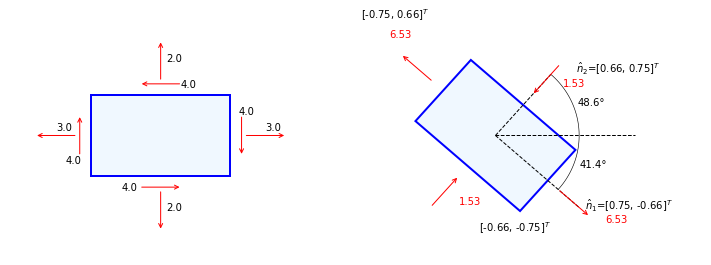